In [3]:
# creation of a simple regression model with the mean of each variable in datasets_3h folder
# and the mean of the target variable in the training set

import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
one_storm = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/instantaneous_10m_wind_gust/storm_1/mean_1_0.csv')
one_storm = np.asarray(one_storm['0'])
#plt.plot(one_storm, label='True', lw=0, marker='o')



In [5]:
# test 2

# open each csv file and read it into a pandas dataframe
name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()

# Create a new list of variables
new_name_of_variables = []
for variable in name_of_variables:
    if variable == 'geopotential':
        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
    else:
        new_name_of_variables.append(variable)

# Iterate over the new list of variables
for i in range(0, len(new_name_of_variables)):

    print(new_name_of_variables[i])

    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range (1,96+1):
        if 'geopotential' in new_name_of_variables[i]:
            for k in [500, 1000]:
                df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

        else:
            df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
            df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
            df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
            df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_{new_name_of_variables[i]}'] = pd.concat([locals()[f'max_{new_name_of_variables[i]}'], df_max_temp], axis=0)
        locals()[f'min_{new_name_of_variables[i]}'] = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{new_name_of_variables[i]}'] = pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{new_name_of_variables[i]}'] = pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=0)

10m_u_component_of_wind
10m_v_component_of_wind
2m_dewpoint_temperature
2m_temperature
cloud_base_height
convective_available_potential_energy
convective_inhibition
convective_precipitation
convective_rain_rate
convective_snowfall
geopotential_500
geopotential_1000
high_cloud_cover
instantaneous_10m_wind_gust
k_index
large_scale_precipitation
large_scale_snowfall
mean_large_scale_precipitation_rate
mean_top_net_long_wave_radiation_flux
mean_top_net_short_wave_radiation_flux
mean_total_precipitation_rate
mean_sea_level_pressure
mean_surface_latent_heat_flux
mean_surface_net_long_wave_radiation_flux
mean_surface_net_short_wave_radiation_flux
mean_vertically_integrated_moisture_divergence
surface_pressure
total_precipitation
total_totals_index


In [6]:
name_of_variables = new_name_of_variables

# remove variable with only one repetitive value in each statistic
for i in range (0, len(name_of_variables)):
    var_name = name_of_variables[i]
    for stat in ['max', 'min', 'mean', 'sigma']:
        df = locals()[f'{stat}_{var_name}']
        cols_to_drop = [col for col in df.columns if df[col].nunique() <= 1]
        locals()[f'{stat}_{var_name}'] = df.drop(columns=cols_to_drop)

# drop nan values and remove empty dataframes
kept_variables = []
for i in range (0, len(name_of_variables)):
    var_name = name_of_variables[i]
    for stat in ['max', 'min', 'mean', 'sigma']:
        df = locals()[f'{stat}_{var_name}']
        df = df.dropna()
        if not df.empty:
            locals()[f'{stat}_{var_name}'] = df
            if var_name not in kept_variables:
                kept_variables.append(var_name)
        else:
            del locals()[f'{stat}_{var_name}']

'''del max_high_cloud_cover
del min_high_cloud_cover'''

# update name_of_variables to only include kept variables
name_of_variables = pd.Series(kept_variables)

In [12]:
# the target variable is the mean of instanteneous_10m_wind_gust
variable_w_high_corr= ['mean_large_scale_precipitation','mean_total_precipitation','mean_mean_large_scale_precipitation_rate','mean_large_scale_snowfall']
#mean_large_scale_precipitation

# mean_low_tropospheric_vertical_velocity??
# create a dataframe with the target variable

target_variable = mean_instantaneous_10m_wind_gust
'''x_variable = mean_total_precipitation

# split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(x_variable, target_variable, test_size=0.2, random_state=42)'''

In [8]:
'''for x_var in variable_w_high_corr:
    X_train, X_test, y_train, y_test = train_test_split(locals()[f'{x_var}'], target_variable, test_size=0.2, random_state=42)'''
    # create a linear regression model
''' model = LinearRegression()

    # fit the model to the training data
    model.fit(X_train, y_train)

    # make predictions on the test set
    y_pred = model.predict(X_test)

    # calculate the mean squared error of the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'The mean squared error of the model with {x_var} as the independent variable is {mse}')'''

" model = LinearRegression()\n\n    # fit the model to the training data\n    model.fit(X_train, y_train)\n\n    # make predictions on the test set\n    y_pred = model.predict(X_test)\n\n    # calculate the mean squared error of the model\n    mse = mean_squared_error(y_test, y_pred)\n    print(f'The mean squared error of the model with {x_var} as the independent variable is {mse}')"

In [9]:
'''for x_var in variable_w_high_corr:
    X_train, X_test, y_train, y_test = train_test_split(locals()[f'{x_var}'], target_variable, test_size=0.2, random_state=42)
    # standardize the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaler.fit(y_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

    # train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f'The mean squared error of the model with {x_var} as the independent variable is {mse}')'''

"for x_var in variable_w_high_corr:\n    X_train, X_test, y_train, y_test = train_test_split(locals()[f'{x_var}'], target_variable, test_size=0.2, random_state=42)\n    # standardize the data\n    scaler = StandardScaler()\n    scaler.fit(X_train)\n    scaler.fit(y_train)\n    X_train = scaler.transform(X_train)\n    X_test = scaler.transform(X_test)\n    y_train = scaler.transform(y_train)\n    y_test = scaler.transform(y_test)\n\n    # train the model\n    model = LinearRegression()\n    model.fit(X_train, y_train)\n\n    # make predictions\n    y_pred = model.predict(X_test)\n\n    # calculate the mean squared error\n    mse = mean_squared_error(y_test, y_pred)\n    print(f'The mean squared error of the model with {x_var} as the independent variable is {mse}')"

In [10]:
# store the mean_large_scale_precipitation in a df, set the name as the header of the column and so the same with mean_total_precipitation
df = mean_large_scale_precipitation
df = df.rename(columns={'0':'mean_large_scale_precipitation'})
#df['mean_large_scale_precipitation'] = mean_large_scale_precipitation
df['mean_total_precipitation'] = mean_total_precipitation
df['mean_mean_large_scale_precipitation_rate'] = mean_mean_large_scale_precipitation_rate
df['mean_large_scale_snowfall'] = mean_large_scale_snowfall


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Définir le modèle
X = df #pd.concat([locals()[f'{x_var}']['0'] for x_var in variable_w_high_corr if f'{x_var}' in locals()], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

model = Sequential()
# Ajouter le nombre de variables à haute corrélation comme variable indépendante
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=42)

# Compiler le modèle
model.compile(optimizer='adam', loss='mse')

# Redimensionner les données pour LSTM
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1]))

# Entraîner le modèle
model.fit(X_train, y_train, epochs=200, verbose=1)

# Faire des prédictions
y_pred = model.predict(X_test)

Epoch 1/200
123/123 [==============================] - 1s 1ms/step - loss: 59.9792
Epoch 2/200
123/123 [==============================] - 0s 1ms/step - loss: 0.2331
Epoch 3/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0903
Epoch 4/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0902
Epoch 5/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 6/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0902
Epoch 7/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0910
Epoch 8/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 9/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0902
Epoch 10/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 11/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0900
Epoch 12/200
123/123 [==============================] - 0s 1ms/step - loss: 0.0909
Epoch 13/200

Using 978 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


100%|██████████| 978/978 [01:33<00:00, 10.49it/s]


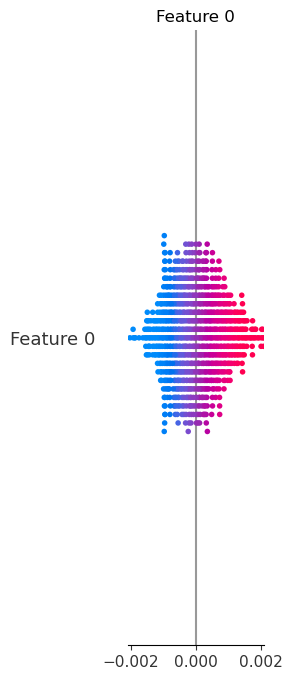

In [25]:
# use shapely to calculate the shap values

import shap

# see the explanation for the model's predictions using SHAP
explainer = shap.KernelExplainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)



In [44]:
# look at the shap values for the first prediction
print(np.asarray(shap_values[:].values).shape)
test = np.squeeze(np.asarray(shap_values[:].values))
test_m = np.mean(test, axis=0)
#shap.plots.waterfall(shap_values[])


(978, 4, 1)


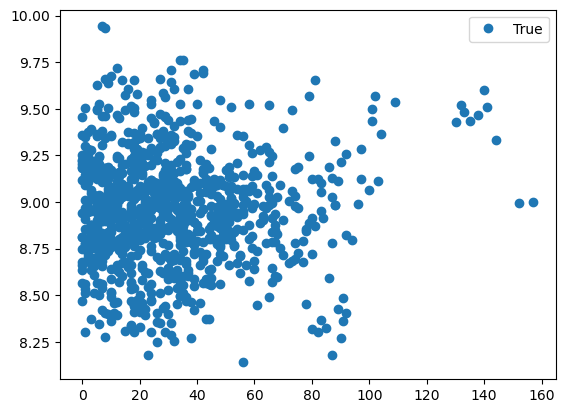

In [15]:
# plot the results 

import matplotlib.pyplot as plt
plt.plot(np.squeeze(y_test), label='True', lw=0, marker='o')
#plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [25]:
# feature importance 

from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x313200350> does not.

In [9]:
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"L'erreur quadratique moyenne du modèle avec {variable_w_high_corr} comme variable indépendante est {mse}")

L'erreur quadratique moyenne du modèle avec ['mean_large_scale_precipitation', 'mean_total_precipitation', 'mean_mean_large_scale_precipitation_rate', 'mean_large_scale_snowfall'] comme variable indépendante est 0.09736820978020143


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"L'erreur absolue moyenne (MAE) du modèle est {mae}")

In [ ]:
from math import sqrt
rmse = sqrt(mse) # mse est l'erreur quadratique moyenne calculée précédemment
print(f"La racine de l'erreur quadratique moyenne (RMSE) du modèle est {rmse}")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Le coefficient de détermination (R²) du modèle est {r2}")